In [5]:
import numpy as np
import pandas as pd

In [6]:
base = pd.read_csv("C:/Users/carlos.oliveira/OneDrive - Faculdade Impacta Tecnologia/IMPACTA 2024/ANO LETIVO 2024/MATÉRIAS/REAL DATA - DRIVEN BUSINESS PROJECT (HANDS-ON)/ecommerce/archive/new_retail_data.csv")
print(base.head())

   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  7

In [7]:
base.shape

(302010, 30)

In [8]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [9]:
base.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


### Segmentação de Clientes

Um algoritmo básico de segmentação de clientes usando RFV pode seguir os seguintes passos:

- Passo 1: Calcular os valores RFM para cada cliente com base em suas transações passadas.


In [10]:
from datetime import datetime


df = pd.DataFrame(base)

# Converter a coluna 'DataTransacao' para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calcular a recência (Recency) para cada cliente
snapshot_date = max(df['Date']) + pd.DateOffset(days=1)  # Data mais recente + 1 dia
df['Recency'] = (snapshot_date - df['Date']).dt.days

# Calcular a frequência (Frequency) para cada cliente
df_frequency = df.groupby('Customer_ID').size().reset_index(name='Frequency')

# Calcular o valor monetário (Monetary) para cada cliente
df_monetary = df.groupby('Customer_ID')['Total_Amount'].sum().reset_index(name='Monetary')

# Combinar todos os dados (RFM) em um único DataFrame
df_rfm = pd.merge(df_frequency, df_monetary, on='Customer_ID')
df_rfm = pd.merge(df_rfm, df[['Customer_ID', 'Recency']], on='Customer_ID')

print("Dados RFM:")
print(df_rfm)

Dados RFM:
        Customer_ID  Frequency     Monetary  Recency
0           10000.0          4  5007.566357    103.0
1           10000.0          4  5007.566357    291.0
2           10000.0          4  5007.566357    215.0
3           10000.0          4  5007.566357    229.0
4           10001.0          5  8136.462824    352.0
...             ...        ...          ...      ...
301697      99998.0          5  6849.837983      5.0
301698      99998.0          5  6849.837983     42.0
301699      99998.0          5  6849.837983    136.0
301700      99999.0          2  5544.688490    181.0
301701      99999.0          2  5544.688490    153.0

[301702 rows x 4 columns]


In [18]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 262.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 293.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 2.0 MB/s eta 0:00:06
    --------------------------------------- 0.1/10.9 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.3/10.9 MB 2.5 MB/s eta 0:00:05
   ----- ---------------------------------- 1.5/10.9 MB 8.8 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/10.9 MB 22.3 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/10.9 MB 25.1 MB/s eta 0:00:01
   -----


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


- Passo 2: Normalizar os valores para garantir que todas as métricas tenham o mesmo peso.

In [19]:
from sklearn.preprocessing import MinMaxScaler

df_rfm = pd.DataFrame(df_rfm)

# Normalizar as métricas RFM usando Min-Max Scaling
scaler = MinMaxScaler()
df_rfm_normalized = df_rfm[['Recency', 'Frequency', 'Monetary']]
df_rfm_normalized = scaler.fit_transform(df_rfm_normalized)

# Substituir as colunas originais pelas colunas normalizadas
df_rfm['Recency'] = df_rfm_normalized[:, 0]
df_rfm['Frequency'] = df_rfm_normalized[:, 1]
df_rfm['Monetary'] = df_rfm_normalized[:, 2]

print("Dados RFM Normalizados:")
print(df_rfm)

Dados RFM Normalizados:
        Customer_ID  Frequency  Monetary   Recency
0           10000.0   0.250000  0.171247  0.279452
1           10000.0   0.250000  0.171247  0.794521
2           10000.0   0.250000  0.171247  0.586301
3           10000.0   0.250000  0.171247  0.624658
4           10001.0   0.333333  0.278248  0.961644
...             ...        ...       ...       ...
301697      99998.0   0.333333  0.234248  0.010959
301698      99998.0   0.333333  0.234248  0.112329
301699      99998.0   0.333333  0.234248  0.369863
301700      99999.0   0.083333  0.189615  0.493151
301701      99999.0   0.083333  0.189615  0.416438

[301702 rows x 4 columns]


In [21]:
df_rfm.dropna(inplace = True)

- Passo 3: Aplicar técnicas de clustering, como k-means ou hierárquico, para agrupar clientes com comportamentos de compra semelhantes.

Centros dos Clusters:
    Recency  Frequency  Monetary
0  0.550543   0.451124  0.325272
1  0.781757   0.223204  0.163318
2  0.218712   0.246898  0.179341
Score de Silhueta: 0.3589405597301611


C:\Users\carlos.oliveira\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


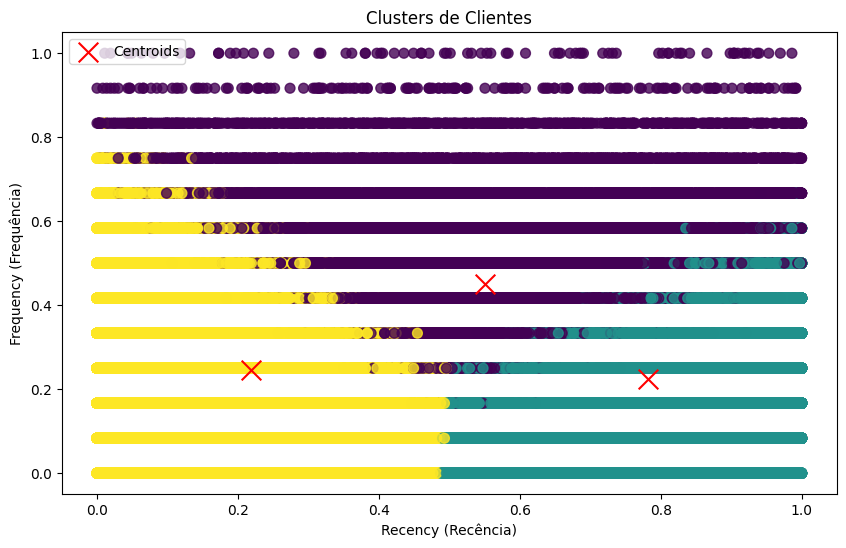

Dados RFM Normalizados com Rótulos de Cluster:
        Customer_ID  Frequency  Monetary   Recency  Cluster
0           10000.0   0.250000  0.171247  0.279452        2
1           10000.0   0.250000  0.171247  0.794521        1
2           10000.0   0.250000  0.171247  0.586301        1
3           10000.0   0.250000  0.171247  0.624658        1
4           10001.0   0.333333  0.278248  0.961644        1
...             ...        ...       ...       ...      ...
301697      99998.0   0.333333  0.234248  0.010959        2
301698      99998.0   0.333333  0.234248  0.112329        2
301699      99998.0   0.333333  0.234248  0.369863        2
301700      99999.0   0.083333  0.189615  0.493151        2
301701      99999.0   0.083333  0.189615  0.416438        2

[301343 rows x 5 columns]


In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


df_rfm_normalized = pd.DataFrame(df_rfm)

# Selecionar as colunas relevantes para clustering
X = df_rfm_normalized[['Recency', 'Frequency', 'Monetary']]

# Aplicar o algoritmo de clustering (por exemplo, k-means)
k = 3  # Número de clusters desejado
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Adicionar os rótulos de cluster de volta ao DataFrame original
df_rfm_normalized['Cluster'] = kmeans.labels_

# Análise dos clusters
cluster_centers = kmeans.cluster_centers_
print("Centros dos Clusters:")
print(pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary']))

# Calcular o score de silhueta para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Score de Silhueta: {silhouette_avg}")

# Visualização dos clusters (para 2 dimensões, por exemplo, Recency vs Frequency)
plt.figure(figsize=(10, 6))
plt.scatter(X['Recency'], X['Frequency'], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Recency (Recência)')
plt.ylabel('Frequency (Frequência)')
plt.legend()
plt.show()

# Exibir o DataFrame com os rótulos de cluster
print("Dados RFM Normalizados com Rótulos de Cluster:")
print(df_rfm_normalized)

- Passo 4: Avaliar e nomear os segmentos gerados com base nos padrões de RFV encontrados.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df_rfm_normalized = pd.DataFrame(df_rfm)

# Selecionar as colunas relevantes para clustering
X = df_rfm_normalized[['Recency', 'Frequency', 'Monetary']]

# Aplicar o algoritmo de clustering (por exemplo, k-means)
k = 3  # Número de clusters desejado
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Adicionar os rótulos de cluster de volta ao DataFrame original
df_rfm_normalized['Cluster'] = kmeans.labels_

# Análise dos clusters
cluster_centers = kmeans.cluster_centers_
print("Centros dos Clusters:")
print(pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary']))

# Calcular o score de silhueta para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Score de Silhueta: {silhouette_avg}")

# Nomear os segmentos com base nos padrões de RFV
# Exemplo de nomeação dos segmentos (pode ser ajustado conforme necessário)
segment_names = {
    0: "Clientes de Baixa Recência e Frequência, Baixo Valor",
    1: "Clientes de Alta Recência e Frequência, Alto Valor",
    2: "Clientes de Média Recência e Frequência, Valor Médio"
}

# Adicionar os nomes dos segmentos ao DataFrame
df_rfm_normalized['Segment'] = df_rfm_normalized['Cluster'].map(segment_names)

# Exibir o DataFrame com os rótulos de cluster e nomes de segmento
print("Dados RFM Normalizados com Rótulos de Cluster e Nomes de Segmento:")
print(df_rfm_normalized)


Centros dos Clusters:
    Recency  Frequency  Monetary
0  0.550543   0.451124  0.325272
1  0.781757   0.223204  0.163318
2  0.218712   0.246898  0.179341
Score de Silhueta: 0.3589405597301611
Dados RFM Normalizados com Rótulos de Cluster e Nomes de Segmento:
        Customer_ID  Frequency  Monetary   Recency  Cluster  \
0           10000.0   0.250000  0.171247  0.279452        2   
1           10000.0   0.250000  0.171247  0.794521        1   
2           10000.0   0.250000  0.171247  0.586301        1   
3           10000.0   0.250000  0.171247  0.624658        1   
4           10001.0   0.333333  0.278248  0.961644        1   
...             ...        ...       ...       ...      ...   
301697      99998.0   0.333333  0.234248  0.010959        2   
301698      99998.0   0.333333  0.234248  0.112329        2   
301699      99998.0   0.333333  0.234248  0.369863        2   
301700      99999.0   0.083333  0.189615  0.493151        2   
301701      99999.0   0.083333  0.189615  0.4164

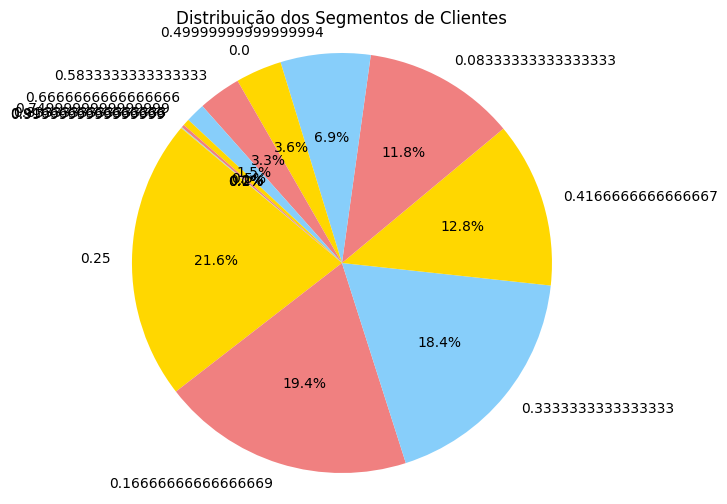

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df_rfm_normalized = pd.DataFrame(df_rfm_normalized)

# Contar o número de clientes em cada segmento
segment_counts = df_rfm_normalized['Frequency'].value_counts()

# Preparar os dados para o gráfico de pizza
labels = segment_counts.index
sizes = segment_counts.values

# Configurar cores para os segmentos (opcional)
colors = ['gold', 'lightcoral', 'lightskyblue']

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Segmentos de Clientes')
plt.axis('equal')  # Garantir que o gráfico de pizza seja desenhado como um círculo

# Exibir o gráfico
plt.show()
